In [5]:
#Version: 0.28.0
#!pip install openai==1.34.0
!pip show openai

Name: openai
Version: 1.34.0
Summary: The official Python library for the openai API
Home-page: 
Author: 
Author-email: OpenAI <support@openai.com>
License: 
Location: C:\Users\Abhishek_Jaiswal\AppData\Local\miniconda3\envs\mlenv\Lib\site-packages
Requires: anyio, distro, httpx, pydantic, sniffio, tqdm, typing-extensions
Required-by: guardrails-ai, langchain-openai, llama-index-agent-openai, llama-index-core, llama-index-legacy, semantic-kernel


In [4]:
from openai import AzureOpenAI
 
client = AzureOpenAI(
            api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD",
            api_version="2023-03-15-preview",
            azure_endpoint="https://ai-proxy.lab.teams.com",
        )
response = client.chat.completions.create(
    model="Mistral-7B-Instruct",
    temperature=0.1,
    messages=[
        {"role": "user", "content": "Tell me a motivation quote"},
    ],
)
response.choices[0].message.content

' "Believe you can and you\'re halfway there." - Theodore Roosevelt\n\nThis quote reminds us that having a strong belief in ourselves and our abilities is a crucial step towards achieving our goals. By believing in ourselves, we can overcome challenges and obstacles, and stay motivated even when faced with setbacks. Remember, the power of belief can help us reach new heights and unlock our full potential.'

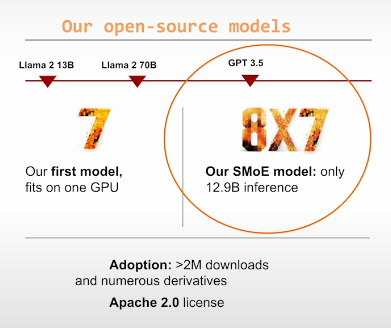

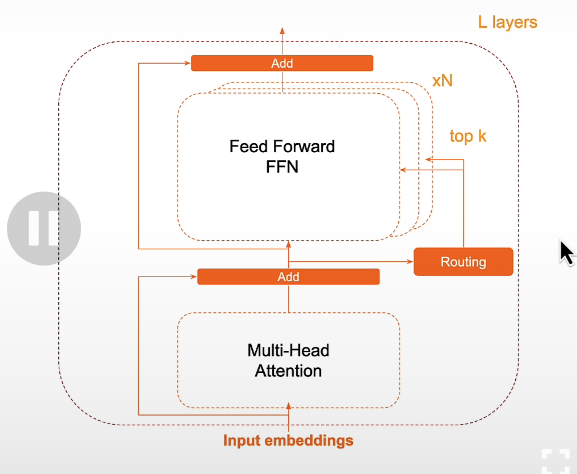

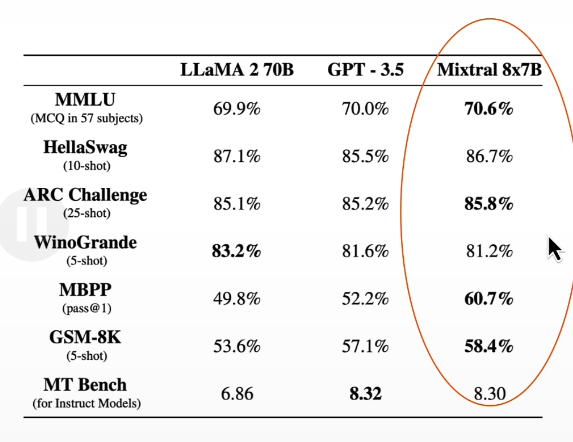

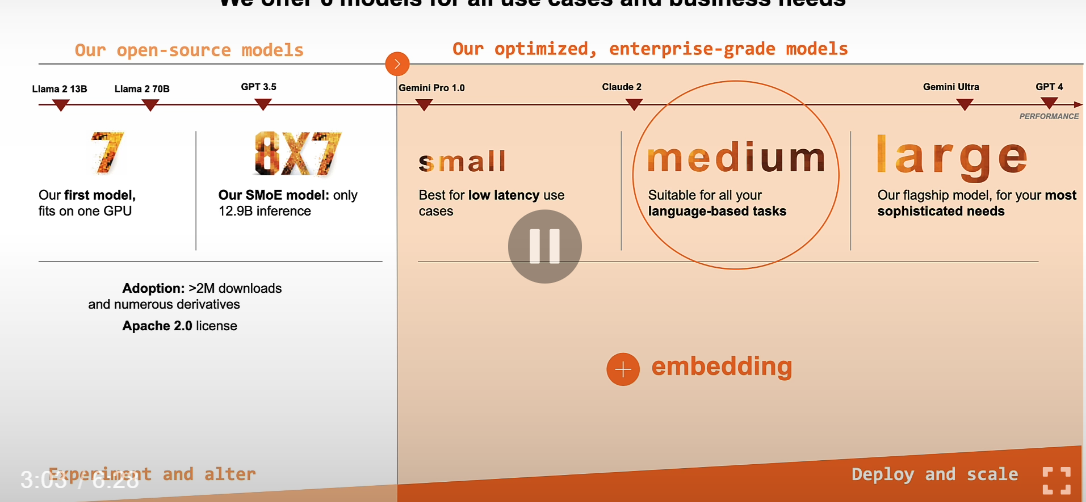

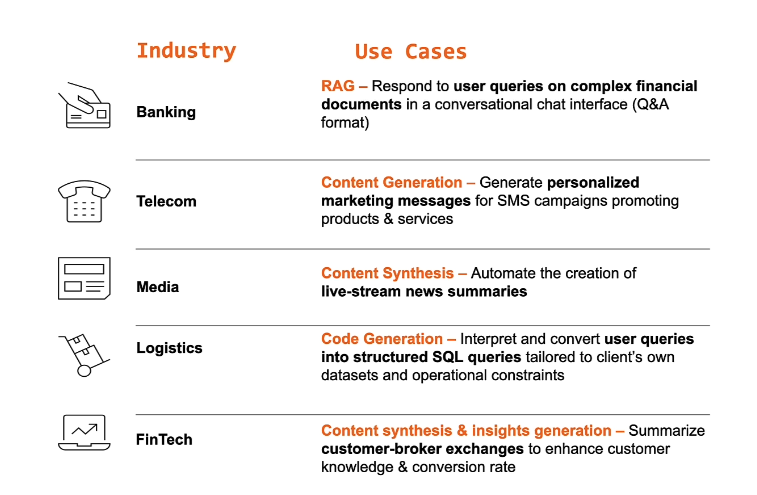

## https://chat.mistral.ai/chat

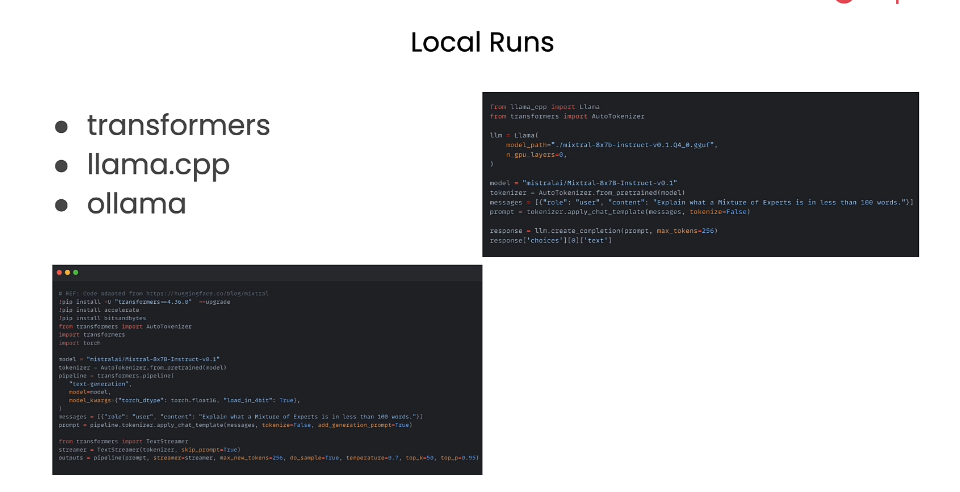

In [6]:
#Admin
# https://console.mistral.ai/
# https://console.mistral.ai/api-keys/
# API keys: Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD
# Name: db_test

# prompting

In [7]:
# !pip install mistralai
# !pip install helper

In [10]:
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
api_key = 'Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD'
mistral = MistralClient(api_key=api_key)
model = "mistral-large-latest"
chat_response = mistral.chat(
    model=model,
    messages=[ChatMessage(role="user", content="What is the best French cheese?")]
)

print(chat_response.choices[0].message.content)

France is renowned for its wide variety of cheeses, and what is considered "best" can depend on personal preference. However, some of the most popular and well-known French cheeses include:

1. Brie: Often referred to as "The Queen of Cheeses," Brie is a soft cheese with a white, edible rind. It's known for its creamy texture and mild, slightly sweet flavor.

2. Camembert: Similar to Brie, Camembert is a soft cheese with a white, edible rind. However, it has a stronger, more earthy flavor.

3. Roquefort: This is a type of blue cheese made from sheep's milk. It has a strong, tangy flavor and a crumbly texture.

4. Comté: A hard cheese made from unpasteurized cow's milk, Comté has a nutty, slightly sweet flavor.

5. Chèvre: This is a general term for cheese made from goat's milk. It can range in texture from soft and spreadable to firm, and it has a tangy, slightly acidic flavor.


In [17]:
#Notes:
#https://www.datacamp.com/tutorial/mistral-7b-tutorial
#https://docs.mistral.ai/getting-started/clients/

## 1. Classification

In [15]:
prompt = """
    You are a bank customer service bot. 
    Your task is to assess customer intent and categorize customer 
    inquiry after <<<>>> into one of the following predefined categories:
    
    card arrival
    change pin
    exchange rate
    country support 
    cancel transfer
    charge dispute
    
    If the text doesn't fit into any of the above categories, 
    classify it as:
    customer service
    
    You will only respond with the predefined category. 
    Do not provide explanations or notes. 
    
    ###
    Here are some examples:
    
    Inquiry: How do I know if I will get my card, or if it is lost? I am concerned about the delivery process and would like to ensure that I will receive my card as expected. Could you please provide information about the tracking process for my card, or confirm if there are any indicators to identify if the card has been lost during delivery?
    Category: card arrival
    Inquiry: I am planning an international trip to Paris and would like to inquire about the current exchange rates for Euros as well as any associated fees for foreign transactions.
    Category: exchange rate 
    Inquiry: What countries are getting support? I will be traveling and living abroad for an extended period of time, specifically in France and Germany, and would appreciate any information regarding compatibility and functionality in these regions.
    Category: country support
    Inquiry: Can I get help starting my computer? I am having difficulty starting my computer, and would appreciate your expertise in helping me troubleshoot the issue. 
    Category: customer service
    ###
    
    <<<
    Inquiry: {inquiry}
    >>>
    Category:
"""

In [ ]:
response = mistral(f"Please correct the spelling and grammar of this prompt and return a text that is the same prompt, with the spelling and grammar fixed: {prompt}")
print(response)

In [ ]:
mistral(
    response.format(
        inquiry="I am inquiring about the availability of your cards in the EU"
    )
)

## 2. Information Extraction with JSON Mode

In [10]:
medical_notes = """
A 60-year-old male patient, Mr. Johnson, presented with symptoms
of increased thirst, frequent urination, fatigue, and unexplained
weight loss. Upon evaluation, he was diagnosed with diabetes,
confirmed by elevated blood sugar levels. Mr. Johnson's weight
is 210 lbs. He has been prescribed Metformin to be taken twice daily
with meals. It was noted during the consultation that the patient is
a current smoker. 
"""

In [11]:
prompt = f"""
Extract information from the following medical notes:
{medical_notes}

Return json format with the following JSON schema: 

{{
        "age": {{
            "type": "integer"
        }},
        "gender": {{
            "type": "string",
            "enum": ["male", "female", "other"]
        }},
        "diagnosis": {{
            "type": "string",
            "enum": ["migraine", "diabetes", "arthritis", "acne"]
        }},
        "weight": {{
            "type": "integer"
        }},
        "smoking": {{
            "type": "string",
            "enum": ["yes", "no"]
        }}
}}
"""

In [ ]:
response = mistral(prompt, is_json=True)
print(response)

## 3. Personalization

In [12]:
email = """
Dear mortgage lender, 

What's your 30-year fixed-rate APR, how is it compared to the 15-year 
fixed rate?

Regards,
Anna
"""

In [13]:
prompt = f"""

You are a mortgage lender customer service bot, and your task is to 
create personalized email responses to address customer questions.
Answer the customer's inquiry using the provided facts below. Ensure 
that your response is clear, concise, and directly addresses the 
customer's question. Address the customer in a friendly and 
professional manner. Sign the email with "Lender Customer Support."   
      
# Facts
30-year fixed-rate: interest rate 6.403%, APR 6.484%
20-year fixed-rate: interest rate 6.329%, APR 6.429%
15-year fixed-rate: interest rate 5.705%, APR 5.848%
10-year fixed-rate: interest rate 5.500%, APR 5.720%
7-year ARM: interest rate 7.011%, APR 7.660%
5-year ARM: interest rate 6.880%, APR 7.754%
3-year ARM: interest rate 6.125%, APR 7.204%
30-year fixed-rate FHA: interest rate 5.527%, APR 6.316%
30-year fixed-rate VA: interest rate 5.684%, APR 6.062%

# Email
{email}
"""

In [ ]:
response = mistral(prompt)
print(response)

## 4. Summarization

In [14]:
newsletter = """
European AI champion Mistral AI unveiled new large language models and formed an alliance with Microsoft. 

What’s new: Mistral AI introduced two closed models, Mistral Large and Mistral Small (joining Mistral Medium, which debuted quietly late last year). Microsoft invested $16.3 million in the French startup, and it agreed to distribute Mistral Large on its Azure platform and let Mistral AI use Azure computing infrastructure. Mistral AI makes the new models available to try for free here and to use on its La Plateforme and via custom deployments.

Model specs: The new models’ parameter counts, architectures, and training methods are undisclosed. Like the earlier, open source Mistral 7B and Mixtral 8x7B, they can process 32,000 tokens of input context. 

Mistral Large achieved 81.2 percent on the MMLU benchmark, outperforming Anthropic’s Claude 2, Google’s Gemini Pro, and Meta’s Llama 2 70B, though falling short of GPT-4. Mistral Small, which is optimized for latency and cost, achieved 72.2 percent on MMLU.
Both models are fluent in French, German, Spanish, and Italian. They’re trained for function calling and JSON-format output.
Microsoft’s investment in Mistral AI is significant but tiny compared to its $13 billion stake in OpenAI and Google and Amazon’s investments in Anthropic, which amount to $2 billion and $4 billion respectively.
Mistral AI and Microsoft will collaborate to train bespoke models for customers including European governments.
Behind the news: Mistral AI was founded in early 2023 by engineers from Google and Meta. The French government has touted the company as a home-grown competitor to U.S.-based leaders like OpenAI. France’s representatives in the European Commission argued on Mistral’s behalf to loosen the European Union’s AI Act oversight on powerful AI models. 

Yes, but: Mistral AI’s partnership with Microsoft has divided European lawmakers and regulators. The European Commission, which already was investigating Microsoft’s agreement with OpenAI for potential breaches of antitrust law, plans to investigate the new partnership as well. Members of President Emmanuel Macron’s Renaissance party criticized the deal’s potential to give a U.S. company access to European users’ data. However, other French lawmakers support the relationship.

Why it matters: The partnership between Mistral AI and Microsoft gives the startup crucial processing power for training large models and greater access to potential customers around the world. It gives the tech giant greater access to the European market. And it gives Azure customers access to a high-performance model that’s tailored to Europe’s unique regulatory environment.

We’re thinking: Mistral AI has made impressive progress in a short time, especially relative to the resources at its disposal as a startup. Its partnership with a leading hyperscaler is a sign of the tremendous processing and distribution power that remains concentrated in the large, U.S.-headquartered cloud companies.
"""

In [15]:
prompt = f"""
You are a commentator. Your task is to write a report on a newsletter. 
When presented with the newsletter, come up with interesting questions to ask,
and answer each question. 
Afterward, combine all the information and write a report in the markdown
format. 

# Newsletter: 
{newsletter}

# Instructions: 
## Summarize:
In clear and concise language, summarize the key points and themes 
presented in the newsletter.

## Interesting Questions: 
Generate three distinct and thought-provoking questions that can be 
asked about the content of the newsletter. For each question:
- After "Q: ", describe the problem 
- After "A: ", provide a detailed explanation of the problem addressed 
in the question.
- Enclose the ultimate answer in <>.

## Write a analysis report
Using the summary and the answers to the interesting questions, 
create a comprehensive report in Markdown format. 
"""

In [ ]:
response = mistral(prompt)
print(response)

## 5. The Mistral Python client

In [18]:
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage   

def mistral(user_message, 
            model="mistral-small-latest",
            is_json=False):
    client = MistralClient(api_key=os.getenv("Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD"))
    messages = [ChatMessage(role="user", content=user_message)]

    if is_json:
        chat_response = client.chat(
            model=model, 
            messages=messages,
            response_format={"type": "json_object"})
    else:
        chat_response = client.chat(
            model=model, 
            messages=messages)
        
    return chat_response.choices[0].message.content

# model-selection

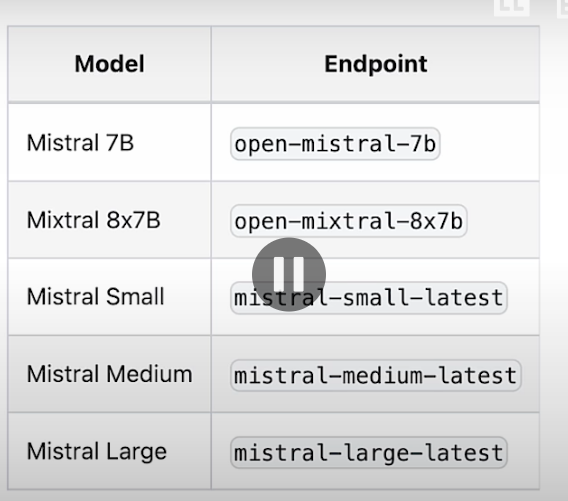

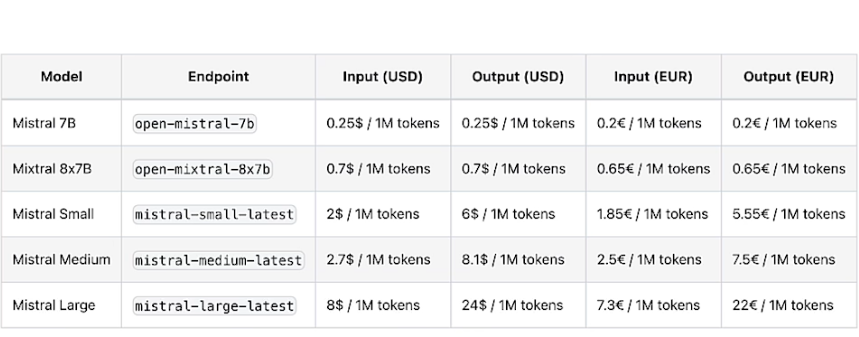

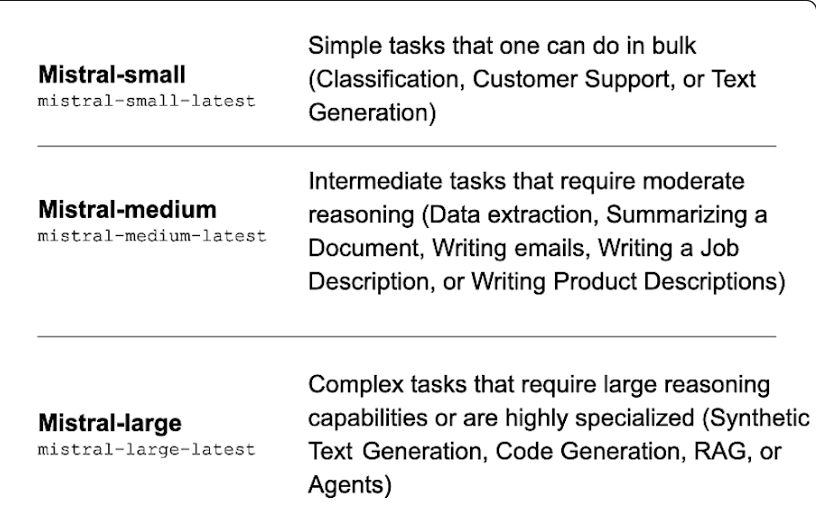

In [21]:
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage   

def mistral(user_message, 
            model="mistral-small-latest",
            is_json=False):
    client = MistralClient(api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD")
    messages = [ChatMessage(role="user", content=user_message)]

    if is_json:
        chat_response = client.chat(
            model=model, 
            messages=messages,
            response_format={"type": "json_object"})
    else:
        chat_response = client.chat(
            model=model, 
            messages=messages)
        
    return chat_response.choices[0].message.content

## 1. Mistral Small

In [22]:
prompt = """
Classify the following email to determine if it is spam or not.
Only respond with the exact text "Spam" or "Not Spam". 

# Email:
🎉 Urgent! You've Won a $1,000,000 Cash Prize! 
💰 To claim your prize, please click on the link below: 
https://bit.ly/claim-your-prize
"""

In [23]:
mistral(prompt, model="mistral-small-latest")

'Spam'

## 2. Mistral Medium

In [24]:
prompt = """
Compose a welcome email for new customers who have just made 
their first purchase with your product. 
Start by expressing your gratitude for their business, 
and then convey your excitement for having them as a customer. 
Include relevant details about their recent order. 
Sign the email with "The Fun Shop Team".

Order details:
- Customer name: Anna
- Product: hat 
- Estimate date of delivery: Feb. 25, 2024
- Return policy: 30 days
"""

In [25]:
response_medium = mistral(prompt, model="mistral-medium-latest")
print(response_medium)

Subject: Welcome to The Fun Shop, Anna! Thank you for your first purchase.

Dear Anna,

We are thrilled to welcome you to The Fun Shop community! We are grateful for your decision to make your first purchase with us and are excited to have you as a customer.

We wanted to take a moment to confirm the details of your recent order:

Product: Hat
Estimated Delivery Date: February 25, 2024

We hope that you will love your new hat! If for any reason you are not completely satisfied with your purchase, please note that we have a 30-day return policy. If you need to return your hat, simply reach out to our customer service team and we will be happy to assist you.

Once again, thank you for choosing The Fun Shop. If you have any questions or concerns, please don't hesitate to reach out to us. We are always here to help!

Best regards,
The Fun Shop Team


## 3. Mistral Large

In [26]:
prompt = """
Calculate the difference in payment dates between the two \
customers whose payment amounts are closest to each other \
in the following dataset. Do not write code.

# dataset: 
'{
  "transaction_id":{"0":"T1001","1":"T1002","2":"T1003","3":"T1004","4":"T1005"},
    "customer_id":{"0":"C001","1":"C002","2":"C003","3":"C002","4":"C001"},
    "payment_amount":{"0":125.5,"1":89.99,"2":120.0,"3":54.3,"4":210.2},
"payment_date":{"0":"2021-10-05","1":"2021-10-06","2":"2021-10-07","3":"2021-10-05","4":"2021-10-08"},
    "payment_status":{"0":"Paid","1":"Unpaid","2":"Paid","3":"Paid","4":"Pending"}
}'
"""

In [27]:
response_small = mistral(prompt, model="mistral-small-latest")
print(response_small)

To solve this, we first need to identify the two customers whose payment amounts are closest to each other. In this dataset, the payment amounts for C001 and C003 are closest to each other (125.5 and 120.0).

Next, we need to find the payment dates for these two customers. The payment date for C001 is "2021-10-05" and for C003 is "2021-10-07".

Finally, we calculate the difference between these two dates. The difference between "2021-10-07" and "2021-10-05" is 2 days.


In [28]:
response_large = mistral(prompt, model="mistral-large-latest")
print(response_large)

To solve this problem without writing code, we first need to identify the two closest payment amounts. The payment amounts are:

1. $125.50 (T1001)
2. $89.99 (T1002)
3. $120.00 (T1003)
4. $54.30 (T1004)
5. $210.20 (T1005)

The two closest payment amounts are $125.50 (T1001) and $120.00 (T1003) with a difference of $5.50.

Next, we need to calculate the difference in payment dates between these two transactions. The payment dates are:

1. 2021-10-05 (T1001)
2. 2021-10-06 (T1002)
3. 2021-10-07 (T1003)
4. 2021-10-05 (T1004)
5. 2021-10-08 (T1005)

The payment date for T1001 is 2021-10-05 and for T1003 is 2021-10-07. So, the difference in payment dates is 2 days.


## 2. Expense reporting task

In [29]:
transactions = """
McDonald's: 8.40
Safeway: 10.30
Carrefour: 15.00
Toys R Us: 20.50
Panda Express: 10.20
Beanie Baby Outlet: 25.60
World Food Wraps: 22.70
Stuffed Animals Shop: 45.10
Sanrio Store: 85.70
"""

prompt = f"""
Given the purchase details, how much did I spend on each category:
1) restaurants
2) groceries
3) stuffed animals and props
{transactions}
"""

In [30]:
response_small = mistral(prompt, model="mistral-small-latest")
print(response_small)

To calculate how much you spent on each category, we need to first identify which transactions belong to which category. Here's my understanding:

1) Restaurants: McDonald's and Panda Express
2) Groceries: Safeway and Carrefour
3) Stuffed animals and props: Toys R Us, Beanie Baby Outlet, Stuffed Animals Shop, and Sanrio Store

Now, let's add up the total spent for each category:

1) Restaurants: $8.40 (McDonald's) + $10.20 (Panda Express) = $18.60
2) Groceries: $10.30 (Safeway) + $15.00 (Carrefour) = $25.30
3) Stuffed animals and props: $20.50 (Toys R Us) + $25.60 (Beanie Baby Outlet) + $45.10 (Stuffed Animals Shop) + $85.70 (Sanrio Store) = $176.90

So, you spent $18.60 on restaurants, $25.30 on groceries, and $176.90 on stuffed animals and props.


In [31]:
response_large = mistral(prompt, model="mistral-large-latest")
print(response_large)

Sure, I'd be happy to help you categorize your spending! Here's the breakdown:

1) Restaurants:
   - McDonald's: $8.40
   - Panda Express: $10.20
   - World Food Wraps: $22.70
   Total spent on restaurants: $41.30

2) Groceries:
   - Safeway: $10.30
   - Carrefour: $15.00
   Total spent on groceries: $25.30

3) Stuffed animals and props:
   - Toys R Us: $20.50
   - Beanie Baby Outlet: $25.60
   - Stuffed Animals Shop: $45.10
   - Sanrio Store: $85.70
   Total spent on stuffed animals and props: $176.90


## 3. Writing and checking code

In [32]:
user_message = """
Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.

You may assume that each input would have exactly one solution, and you may not use the same element twice.

You can return the answer in any order.

Your code should pass these tests:

assert twoSum([2,7,11,15], 9) == [0,1]
assert twoSum([3,2,4], 6) == [1,2]
assert twoSum([3,3], 6) == [0,1]
"""

In [33]:
print(mistral(user_message, model="mistral-large-latest"))

Here's a Python solution using a dictionary to store the numbers we've seen so far and their indices. We iterate through the array and for each number, we check if its complement (target minus the current number) is in the dictionary. If it is, we return the indices of the complement and the current number. If it's not, we add the current number and its index to the dictionary.

```python
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
```

This code will pass the tests provided because it correctly identifies the two numbers that add up to the target and returns their indices. The time complexity is O(n) because we only iterate through the array once, and the space complexity is also O(n) because in the worst case scenario, we would need to store all the numbers in the array.


## 4. Natively Fluent in English, French, Spanish, German, and Italian

In [34]:
user_message = """
Lequel est le plus lourd une livre de fer ou un kilogramme de plume
"""

In [35]:
print(mistral(user_message, model="mistral-large-latest"))

Une livre de fer pèse environ 0,45 kilogramme, tandis qu'un kilogramme de plumes pèse 1 kilogramme. Donc, un kilogramme de plumes est plus lourd qu'une livre de fer.

Cependant, il est important de noter que cette comparaison est un peu trompeuse car une livre et un kilogramme sont des unités de mesure différentes. Si l'on comparait une livre de plumes à une livre de fer, les deux pèseraient le même poids. De même, si l'on comparait un kilogramme de fer à un kilogramme de plumes, les deux pèseraient également le même poids.


## List of Mistral models that you can call:

In [36]:
#open-mistral-7b
#open-mixtral-8x7b
#open-mixtral-8x22b
#mistral-small-latest
#mistral-medium-latest
#mistral-large-latest
#mistral(prompt, model="open-mixtral-8x22b")

# Mistral Embeddings API

In [37]:
from mistralai.client import MistralClient

client = MistralClient(api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD")

embeddings_batch_response = client.embeddings(
    model="mistral-embed",
    input=["Embed this sentence.", "As well as this one."],
)

In [39]:
embeddings_batch_response

EmbeddingResponse(id='d269359103924c2a8bab8132db012d40', object='list', data=[EmbeddingObject(object='embedding', embedding=[-0.0165863037109375, 0.07012939453125, 0.031494140625, 0.013092041015625, 0.020416259765625, 0.00977325439453125, 0.0256195068359375, 0.0021114349365234375, -0.00867462158203125, -0.00876617431640625, -0.039520263671875, 0.058441162109375, -0.025390625, 0.00748443603515625, -0.0290679931640625, 0.040557861328125, 0.05474853515625, 0.0258636474609375, 0.031890869140625, 0.0230255126953125, -0.056427001953125, -0.01617431640625, -0.061248779296875, 0.012115478515625, -0.045745849609375, -0.0269622802734375, -0.0079498291015625, -0.03778076171875, -0.040008544921875, 0.000823974609375, 0.0242767333984375, -0.02996826171875, 0.0305023193359375, -0.0022830963134765625, -0.012237548828125, -0.036163330078125, -0.033172607421875, -0.044891357421875, 0.01326751708984375, 0.0021228790283203125, 0.00978851318359375, -0.00021147727966308594, -0.0305633544921875, -0.02308654

In [40]:
len(embeddings_batch_response.data[0].embedding)

1024

In [41]:
from sklearn.metrics.pairwise import euclidean_distances

def get_text_embedding(input):
    embeddings_batch_response = client.embeddings(
        model="mistral-embed",
        input=input
    )
    return embeddings_batch_response.data[0].embedding

In [42]:
sentences = [
    "A home without a cat — and a well-fed, well-petted and properly revered cat — may be a perfect home, perhaps, but how can it prove title?",
    "I think books are like people, in the sense that they'll turn up in your life when you most need them"
]
embeddings = [get_text_embedding(t) for t in sentences]

reference_sentence = "Books are mirrors: You only see in them what you already have inside you"
reference_embedding = get_text_embedding(reference_sentence)

for t, e in zip(sentences, embeddings):
    distance = euclidean_distances([e], [reference_embedding])
    print(t, distance)

A home without a cat — and a well-fed, well-petted and properly revered cat — may be a perfect home, perhaps, but how can it prove title? [[0.80094257]]
I think books are like people, in the sense that they'll turn up in your life when you most need them [[0.56210557]]


# Paraphrase detection

In [43]:
import itertools

sentences = [
    "Have a safe happy Memorial Day weekend everyone",
    "To all our friends at Whatsit Productions Films enjoy a safe happy Memorial Day weekend",
    "Where can I find the best cheese?",
]

sentence_embeddings = [get_text_embedding(t) for t in sentences]

sentence_embeddings_pairs = list(itertools.combinations(sentence_embeddings, 2))
sentence_pairs = list(itertools.combinations(sentences, 2))
for s, e in zip(sentence_pairs, sentence_embeddings_pairs):
    print(s, euclidean_distances([e[0]], [e[1]]))

('Have a safe happy Memorial Day weekend everyone', 'To all our friends at Whatsit Productions Films enjoy a safe happy Memorial Day weekend') [[0.54326686]]
('Have a safe happy Memorial Day weekend everyone', 'Where can I find the best cheese?') [[0.92573978]]
('To all our friends at Whatsit Productions Films enjoy a safe happy Memorial Day weekend', 'Where can I find the best cheese?') [[0.9114184]]


In [44]:
#https://docs.mistral.ai/capabilities/embeddings/

# function-calling

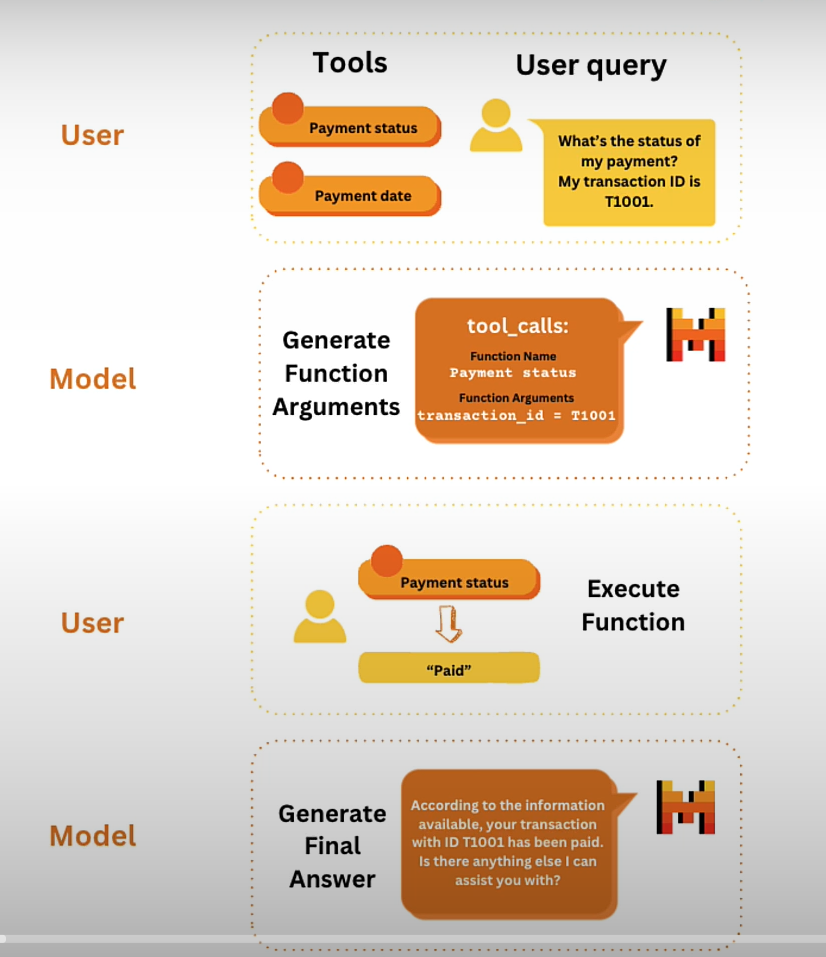

In [45]:
import pandas as pd

In [46]:
data = {
    "transaction_id": ["T1001", "T1002", "T1003", "T1004", "T1005"],
    "customer_id": ["C001", "C002", "C003", "C002", "C001"],
    "payment_amount": [125.50, 89.99, 120.00, 54.30, 210.20],
    "payment_date": [
        "2021-10-05",
        "2021-10-06",
        "2021-10-07",
        "2021-10-05",
        "2021-10-08",
    ],
    "payment_status": ["Paid", "Unpaid", "Paid", "Paid", "Pending"],
}
df = pd.DataFrame(data)

In [47]:
df

,transaction_id,customer_id,payment_amount,payment_date,payment_status
0,T1001,C001,125.50,2021-10-05,Paid
1,T1002,C002,89.99,2021-10-06,Unpaid
2,T1003,C003,120.00,2021-10-07,Paid
3,T1004,C002,54.30,2021-10-05,Paid
4,T1005,C001,210.20,2021-10-08,Pending


In [48]:
data = """
    "transaction_id": ["T1001", "T1002", "T1003", "T1004", "T1005"],
    "customer_id": ["C001", "C002", "C003", "C002", "C001"],
    "payment_amount": [125.50, 89.99, 120.00, 54.30, 210.20],
    "payment_date": [
        "2021-10-05",
        "2021-10-06",
        "2021-10-07",
        "2021-10-05",
        "2021-10-08",
    ],
    "payment_status": ["Paid", "Unpaid", "Paid", "Paid", "Pending"],
}
"""
transaction_id = "T1001"

prompt = f"""
Given the following data, what is the payment status for \
 transaction_id={transaction_id}?

data:
{data}

"""

In [51]:
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage


def mistral(user_message, model="mistral-small-latest", is_json=False):
    client = MistralClient(api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD", endpoint="db_test") #, endpoint="db_test"
    messages = [ChatMessage(role="user", content=user_message)]

    if is_json:
        chat_response = client.chat(
            model=model, messages=messages, response_format={"type": "json_object"}
        )
    else:
        chat_response = client.chat(model=model, messages=messages)

    return chat_response.choices[0].message.content

In [52]:
response = mistral(prompt)
print(response)

MistralException: Unexpected exception (UnsupportedProtocol): Request URL is missing an 'http://' or 'https://' protocol.

## Step 1. User: specify tools and query

In [53]:
import json
def retrieve_payment_status(df: data, transaction_id: str) -> str:
    if transaction_id in df.transaction_id.values:
        return json.dumps(
            {"status": df[df.transaction_id == transaction_id].payment_status.item()}
        )
    return json.dumps({"error": "transaction id not found."})

In [54]:
status = retrieve_payment_status(df, transaction_id="T1001")
print(status)

{"status": "Paid"}


In [55]:
type(status)

str

In [56]:
def retrieve_payment_date(df: data, transaction_id: str) -> str:
    if transaction_id in df.transaction_id.values:
        return json.dumps(
            {"date": df[df.transaction_id == transaction_id].payment_date.item()}
        )
    return json.dumps({"error": "transaction id not found."})

In [57]:
date = retrieve_payment_date(df, transaction_id="T1002")
print(date)

{"date": "2021-10-06"}


In [58]:
tool_payment_status = {
    "type": "function",
    "function": {
        "name": "retrieve_payment_status",
        "description": "Get payment status of a transaction",
        "parameters": {
            "type": "object",
            "properties": {
                "transaction_id": {
                    "type": "string",
                    "description": "The transaction id.",
                }
            },
            "required": ["transaction_id"],
        },
    },
}

In [59]:
type(tool_payment_status)

dict

In [60]:
tool_payment_date = {
    "type": "function",
    "function": {
        "name": "retrieve_payment_date",
        "description": "Get payment date of a transaction",
        "parameters": {
            "type": "object",
            "properties": {
                "transaction_id": {
                    "type": "string",
                    "description": "The transaction id.",
                }
            },
            "required": ["transaction_id"],
        },
    },
}

In [61]:
type(tool_payment_status)

dict

In [62]:
tools = [tool_payment_status, tool_payment_date]

In [63]:
type(tools)

list

In [64]:
tools

[{'type': 'function',
  'function': {'name': 'retrieve_payment_status',
   'description': 'Get payment status of a transaction',
   'parameters': {'type': 'object',
    'properties': {'transaction_id': {'type': 'string',
      'description': 'The transaction id.'}},
    'required': ['transaction_id']}}},
 {'type': 'function',
  'function': {'name': 'retrieve_payment_date',
   'description': 'Get payment date of a transaction',
   'parameters': {'type': 'object',
    'properties': {'transaction_id': {'type': 'string',
      'description': 'The transaction id.'}},
    'required': ['transaction_id']}}}]

## 2. functools

In [65]:
import functools

In [66]:
names_to_functions = {
    "retrieve_payment_status": functools.partial(retrieve_payment_status, df=df),
    "retrieve_payment_date": functools.partial(retrieve_payment_date, df=df),
}

In [67]:
names_to_functions["retrieve_payment_status"](transaction_id="T1001")

'{"status": "Paid"}'

In [68]:
tools

[{'type': 'function',
  'function': {'name': 'retrieve_payment_status',
   'description': 'Get payment status of a transaction',
   'parameters': {'type': 'object',
    'properties': {'transaction_id': {'type': 'string',
      'description': 'The transaction id.'}},
    'required': ['transaction_id']}}},
 {'type': 'function',
  'function': {'name': 'retrieve_payment_date',
   'description': 'Get payment date of a transaction',
   'parameters': {'type': 'object',
    'properties': {'transaction_id': {'type': 'string',
      'description': 'The transaction id.'}},
    'required': ['transaction_id']}}}]

## 3. User query

In [69]:
from mistralai.models.chat_completion import ChatMessage

chat_history = [
    ChatMessage(role="user", content="What's the status of my transaction?")
]

In [70]:
chat_history

[ChatMessage(role='user', content="What's the status of my transaction?", name=None, tool_calls=None)]

## Step 2. Model: Generate function arguments

In [75]:
from mistralai.client import MistralClient

model = "mistral-large-latest"

client = MistralClient(api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD") #, endpoint="https://ai-proxy.lab.epam.com"

response = client.chat(
    model=model, messages=chat_history, tools=tools, tool_choice="auto"
)

response

ChatCompletionResponse(id='15653c98457e4771a81660f0f2c01d1b', object='chat.completion', created=1718815428, model='mistral-large-latest', choices=[ChatCompletionResponseChoice(index=0, message=ChatMessage(role='assistant', content='To get the status of your transaction, I need the transaction ID. Could you please provide it?', name=None, tool_calls=None), finish_reason=<FinishReason.stop: 'stop'>)], usage=UsageInfo(prompt_tokens=161, total_tokens=181, completion_tokens=20))

In [76]:
response.choices[0].message.content

'To get the status of your transaction, I need the transaction ID. Could you please provide it?'

## 4. Save the chat history

In [77]:
chat_history.append(
    ChatMessage(role="assistant", content=response.choices[0].message.content)
)
chat_history.append(ChatMessage(role="user", content="My transaction ID is T1001."))
chat_history

[ChatMessage(role='user', content="What's the status of my transaction?", name=None, tool_calls=None),
 ChatMessage(role='assistant', content='To get the status of your transaction, I need the transaction ID. Could you please provide it?', name=None, tool_calls=None),
 ChatMessage(role='user', content='My transaction ID is T1001.', name=None, tool_calls=None)]

In [78]:
response = client.chat(
    model=model, messages=chat_history, tools=tools, tool_choice="auto"
)

In [79]:
response

ChatCompletionResponse(id='5da2102b1d034862a056f7921689ed23', object='chat.completion', created=1718815480, model='mistral-large-latest', choices=[ChatCompletionResponseChoice(index=0, message=ChatMessage(role='assistant', content='', name=None, tool_calls=[ToolCall(id='wF1ygzB2r', type=<ToolType.function: 'function'>, function=FunctionCall(name='retrieve_payment_status', arguments='{"transaction_id": "T1001"}'))]), finish_reason=<FinishReason.tool_calls: 'tool_calls'>)], usage=UsageInfo(prompt_tokens=194, total_tokens=224, completion_tokens=30))

In [80]:
response.choices[0].message

ChatMessage(role='assistant', content='', name=None, tool_calls=[ToolCall(id='wF1ygzB2r', type=<ToolType.function: 'function'>, function=FunctionCall(name='retrieve_payment_status', arguments='{"transaction_id": "T1001"}'))])

In [82]:
chat_history.append(response.choices[0].message)

#Notice these fields:
#name='retrieve_payment_status'
#arguments='{"transaction_id": "T1001"}'

## Step 3. User: Execute function to obtain tool results

In [83]:
tool_function = response.choices[0].message.tool_calls[0].function
print(tool_function)

name='retrieve_payment_status' arguments='{"transaction_id": "T1001"}'


In [84]:
tool_function.name

'retrieve_payment_status'

In [85]:
tool_function.arguments

'{"transaction_id": "T1001"}'

In [86]:
args = json.loads(tool_function.arguments)
print(args)

{'transaction_id': 'T1001'}


In [87]:
function_result = names_to_functions[tool_function.name](**args)
function_result

'{"status": "Paid"}'

In [88]:
tool_msg = ChatMessage(role="tool", name=tool_function.name, content=function_result)
chat_history.append(tool_msg)

In [89]:
chat_history

[ChatMessage(role='user', content="What's the status of my transaction?", name=None, tool_calls=None),
 ChatMessage(role='assistant', content='To get the status of your transaction, I need the transaction ID. Could you please provide it?', name=None, tool_calls=None),
 ChatMessage(role='user', content='My transaction ID is T1001.', name=None, tool_calls=None),
 ChatMessage(role='assistant', content='', name=None, tool_calls=[ToolCall(id='wF1ygzB2r', type=<ToolType.function: 'function'>, function=FunctionCall(name='retrieve_payment_status', arguments='{"transaction_id": "T1001"}'))]),
 ChatMessage(role='assistant', content='', name=None, tool_calls=[ToolCall(id='wF1ygzB2r', type=<ToolType.function: 'function'>, function=FunctionCall(name='retrieve_payment_status', arguments='{"transaction_id": "T1001"}'))]),
 ChatMessage(role='tool', content='{"status": "Paid"}', name='retrieve_payment_status', tool_calls=None)]

## Step 4. Model: Generate final answer

In [91]:
from mistralai.client import MistralClient
from mistralai.models.chat_completion import ChatMessage
api_key = 'Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD'
model = "mistral-large-latest"
client = MistralClient(api_key=api_key)

In [ ]:
response = client.chat(model=model, messages=chat_history)
response.choices[0].message.content

# Basic RAG (Retrieval Augmented Generation)

## Parse the article with BeautifulSoup

In [93]:
import requests
from bs4 import BeautifulSoup
import re

response = requests.get(
    "https://www.deeplearning.ai/the-batch/a-roadmap-explores-how-ai-can-detect-and-mitigate-greenhouse-gases/"
)
html_doc = response.text
soup = BeautifulSoup(html_doc, "html.parser")
tag = soup.find("div", re.compile("^prose--styled"))
text = tag.text
print(text)

How can AI help to fight climate change? A new report evaluates progress so far and explores options for the future.What’s new: The Innovation for Cool Earth Forum, a conference of climate researchers hosted by Japan, published a roadmap for the use of data science, computer vision, and AI-driven simulation to reduce greenhouse gas emissions. The roadmap evaluates existing approaches and suggests ways to scale them up.How it works: The roadmap identifies 6 “high-potential opportunities”: activities in which AI systems can make a significant difference based on the size of the opportunity, real-world results, and validated research. The authors emphasize the need for data, technical and scientific talent, computing power, funding, and leadership to take advantage of these opportunities.Monitoring emissions. AI systems analyze data from satellites, drones, and ground sensors to measure greenhouse gas emissions. The European Union uses them to measure methane emissions, environmental orga

In [94]:
file_name = "AI_greenhouse_gas.txt"
with open(file_name, 'w') as file:
    file.write(text)

## Chunking

In [95]:
chunk_size = 512
chunks = [text[i : i + chunk_size] for i in range(0, len(text), chunk_size)]

In [96]:
len(chunks)

8

## Get embeddings of the chunks

In [97]:

from mistralai.client import MistralClient


def get_text_embedding(txt):
    client = MistralClient(api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD") #, endpoint=dlai_endpoint
    embeddings_batch_response = client.embeddings(model="mistral-embed", input=txt)
    return embeddings_batch_response.data[0].embedding

In [98]:
import numpy as np

text_embeddings = np.array([get_text_embedding(chunk) for chunk in chunks])

In [99]:
text_embeddings

array([[-0.03274536,  0.04751587,  0.04489136, ..., -0.03289795,
         0.02278137, -0.01459503],
       [-0.03631592,  0.05548096,  0.03271484, ..., -0.03125   ,
         0.01594543, -0.01722717],
       [-0.04876709,  0.04779053,  0.05670166, ...,  0.0046463 ,
         0.0184021 , -0.01251984],
       ...,
       [-0.02597046,  0.04049683,  0.03543091, ..., -0.01013184,
        -0.00962067, -0.00917053],
       [-0.03025818,  0.0541687 ,  0.06280518, ..., -0.00900269,
        -0.00782776, -0.00432587],
       [-0.02456665,  0.05093384,  0.04879761, ..., -0.0064888 ,
         0.02600098, -0.01386261]])

In [100]:
len(text_embeddings[0])

1024

## Store in a vector databsae: Faiss

In [101]:
import faiss

d = text_embeddings.shape[1]
index = faiss.IndexFlatL2(d)
index.add(text_embeddings)

## Embed the user query

In [102]:
question = "What are the ways that AI can reduce emissions in Agriculture?"
question_embeddings = np.array([get_text_embedding(question)])

In [103]:
question_embeddings

array([[-0.00073624,  0.04116821,  0.04318237, ..., -0.02453613,
         0.01029968,  0.00930023]])

## Search for chunks that are similar to the query

In [104]:
D, I = index.search(question_embeddings, k=2)
print(I)

[[4 5]]


In [105]:
retrieved_chunk = [chunks[i] for i in I.tolist()[0]]
print(retrieved_chunk)

['data to help factories use more recycled materials, cut waste, minimize energy use, and reduce downtime. Similarly, they can optimize supply chains to reduce emissions contributed by logistics.\xa0Agriculture.\xa0Farmers use AI-equipped sensors to simulate different crop rotations and weather events to forecast crop yield or loss. Armed with this data, food producers can cut waste and reduce carbon footprints. The authors cite lack of food-related datasets and investment in adapting farming practices as primary b', 'arriers to taking full advantage of AI in the food industry.Transportation.\xa0AI systems can reduce greenhouse-gas emissions by improving traffic flow, ameliorating congestion, and optimizing public transportation. Moreover, reinforcement learning can reduce the impact of electric vehicles on the power grid by optimizing their charging. More data, uniform standards, and AI talent are needed to realize this potential.Materials.\xa0Materials scientists use AI models to stu

In [106]:
prompt = f"""
Context information is below.
---------------------
{retrieved_chunk}
---------------------
Given the context information and not prior knowledge, answer the query.
Query: {question}
Answer:
"""

In [107]:
from mistralai.models.chat_completion import ChatMessage


def mistral(user_message, model="mistral-small-latest", is_json=False):
    client = MistralClient(api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD") #, endpoint=dlai_endpoint
    messages = [ChatMessage(role="user", content=user_message)]

    if is_json:
        chat_response = client.chat(
            model=model, messages=messages, response_format={"type": "json_object"}
        )
    else:
        chat_response = client.chat(model=model, messages=messages)

    return chat_response.choices[0].message.content

In [108]:
response = mistral(prompt)
print(response)

In Agriculture, AI-equipped sensors are used to simulate different crop rotations and weather events, helping farmers forecast crop yield or loss. With this data, food producers can cut waste and reduce their carbon footprints. However, the authors note that lack of food-related datasets and investment in adapting farming practices are primary barriers to taking full advantage of AI in the food industry.


# RAG + Function calling

In [109]:
def qa_with_context(text, question, chunk_size=512):
    # split document into chunks
    chunks = [text[i : i + chunk_size] for i in range(0, len(text), chunk_size)]
    # load into a vector database
    text_embeddings = np.array([get_text_embedding(chunk) for chunk in chunks])
    d = text_embeddings.shape[1]
    index = faiss.IndexFlatL2(d)
    index.add(text_embeddings)
    # create embeddings for a question
    question_embeddings = np.array([get_text_embedding(question)])
    # retrieve similar chunks from the vector database
    D, I = index.search(question_embeddings, k=2)
    retrieved_chunk = [chunks[i] for i in I.tolist()[0]]
    # generate response based on the retrieve relevant text chunks

    prompt = f"""
    Context information is below.
    ---------------------
    {retrieved_chunk}
    ---------------------
    Given the context information and not prior knowledge, answer the query.
    Query: {question}
    Answer:
    """
    response = mistral(prompt)
    return response

In [110]:
I.tolist()

[[4, 5]]

In [111]:
I.tolist()[0]

[4, 5]

In [112]:
import functools

names_to_functions = {"qa_with_context": functools.partial(qa_with_context, text=text)}

In [113]:
tools = [
    {
        "type": "function",
        "function": {
            "name": "qa_with_context",
            "description": "Answer user question by retrieving relevant context",
            "parameters": {
                "type": "object",
                "properties": {
                    "question": {
                        "type": "string",
                        "description": "user question",
                    }
                },
                "required": ["question"],
            },
        },
    },
]

In [114]:
question = """
What are the ways AI can mitigate climate change in transportation?
"""

client = MistralClient(api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD") #, endpoint=dlai_endpoint

response = client.chat(
    model="mistral-large-latest",
    messages=[ChatMessage(role="user", content=question)],
    tools=tools,
    tool_choice="any",
)

response

ChatCompletionResponse(id='49b5b9b15e9c49e68593790de5720dea', object='chat.completion', created=1718816292, model='mistral-large-latest', choices=[ChatCompletionResponseChoice(index=0, message=ChatMessage(role='assistant', content='', name=None, tool_calls=[ToolCall(id='imjD9kc0U', type=<ToolType.function: 'function'>, function=FunctionCall(name='qa_with_context', arguments='{"question": "What are the ways AI can mitigate climate change in transportation?"}'))]), finish_reason=<FinishReason.tool_calls: 'tool_calls'>)], usage=UsageInfo(prompt_tokens=92, total_tokens=126, completion_tokens=34))

In [115]:
tool_function = response.choices[0].message.tool_calls[0].function
tool_function

FunctionCall(name='qa_with_context', arguments='{"question": "What are the ways AI can mitigate climate change in transportation?"}')

In [116]:
tool_function.name

'qa_with_context'

In [117]:
import json

args = json.loads(tool_function.arguments)
args

{'question': 'What are the ways AI can mitigate climate change in transportation?'}

In [118]:
function_result = names_to_functions[tool_function.name](**args)
function_result

'Based on the provided context, the specific ways AI can mitigate climate change in transportation are not explicitly mentioned. However, it is stated that AI has high-potential opportunities in various sectors including manufacturing, food production, and transportation. These opportunities could involve data science, computer vision, and AI-driven simulation to reduce greenhouse gas emissions.\n\nIn the context of transportation, this could potentially mean using AI to optimize routes for vehicles, improving energy efficiency in public transport systems, or developing autonomous vehicles that consume less energy. However, these are speculations based on the general role of AI in other sectors and its potential application in transportation. For a definitive answer, more specific context or information would be needed.'

# chatbot

## Panel

In [132]:
!pip install param==1.13.0

In [133]:
import panel as pn

In [134]:
import panel as pn
pn.extension()

## Basic Chat UI

In [135]:
from mistralai.models.chat_completion import ChatMessage
from mistralai.client import MistralClient

def run_mistral(contents, user, chat_interface):
    client = MistralClient(api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD") #, endpoint=dlai_endpoint
    messages = [ChatMessage(role="user", content=contents)]
    chat_response = client.chat(
        model="mistral-large-latest", 
        messages=messages)
    return chat_response.choices[0].message.content

In [ ]:
chat_interface = pn.chat.ChatInterface(
    callback=run_mistral, 
    callback_user="Mistral"
)

chat_interface

## RAG UI

In [137]:
import requests
from bs4 import BeautifulSoup
import re

response = requests.get(
    "https://www.deeplearning.ai/the-batch/a-roadmap-explores-how-ai-can-detect-and-mitigate-greenhouse-gases/"
)
html_doc = response.text
soup = BeautifulSoup(html_doc, "html.parser")
tag = soup.find("div", re.compile("^prose--styled"))
text = tag.text
print(text)

# Optionally save this text into a file.
file_name = "AI_greenhouse_gas.txt"
with open(file_name, 'w') as file:
    file.write(text)

How can AI help to fight climate change? A new report evaluates progress so far and explores options for the future.What’s new: The Innovation for Cool Earth Forum, a conference of climate researchers hosted by Japan, published a roadmap for the use of data science, computer vision, and AI-driven simulation to reduce greenhouse gas emissions. The roadmap evaluates existing approaches and suggests ways to scale them up.How it works: The roadmap identifies 6 “high-potential opportunities”: activities in which AI systems can make a significant difference based on the size of the opportunity, real-world results, and validated research. The authors emphasize the need for data, technical and scientific talent, computing power, funding, and leadership to take advantage of these opportunities.Monitoring emissions. AI systems analyze data from satellites, drones, and ground sensors to measure greenhouse gas emissions. The European Union uses them to measure methane emissions, environmental orga

In [139]:
import numpy as np
import faiss

client = MistralClient(
    api_key="Yv4HUs53gFzv2Hn8DlFs0WKVjOSv3wjD"
    #endpoint=os.getenv("DLAI_MISTRAL_API_ENDPOINT")
)

prompt = """
Context information is below.
---------------------
{retrieved_chunk}
---------------------
Given the context information and not prior knowledge, answer the query.
Query: {question}
Answer:
"""

def get_text_embedding(input):
    embeddings_batch_response = client.embeddings(model="mistral-embed", input=input)
    return embeddings_batch_response.data[0].embedding

def run_mistral(user_message, model="mistral-large-latest"):
    messages = [ChatMessage(role="user", content=user_message)]
    chat_response = client.chat(model=model, messages=messages)
    return chat_response.choices[0].message.content

def answer_question(question, user, instance):
    text = file_input.value.decode("utf-8")

    # split document into chunks
    chunk_size = 2048
    chunks = [text[i : i + chunk_size] for i in range(0, len(text), chunk_size)]
    # load into a vector database
    text_embeddings = np.array([get_text_embedding(chunk) for chunk in chunks])
    d = text_embeddings.shape[1]
    index = faiss.IndexFlatL2(d)
    index.add(text_embeddings)
    # create embeddings for a question
    question_embeddings = np.array([get_text_embedding(question)])
    # retrieve similar chunks from the vector database
    D, I = index.search(question_embeddings, k=2)
    retrieved_chunk = [chunks[i] for i in I.tolist()[0]]
    # generate response based on the retrieved relevant text chunks
    response = run_mistral(
        prompt.format(retrieved_chunk=retrieved_chunk, question=question)
    )
    return response

In [ ]:
#Connect the Chat interface with your user-defined function
file_input = pn.widgets.FileInput(accept=".txt", value="", height=50)

chat_interface = pn.chat.ChatInterface(
    callback=answer_question,
    callback_user="Mistral",
    header=pn.Row(file_input, "### Upload a text file to chat with it!"),
)
chat_interface.send(
    "Send a message to get a reply from Mistral!", 
    user="System", 
    respond=False
)
chat_interface